## read results 

In [987]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [988]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [989]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from hockey.core.animation.animate_particles_on_ice import read_and_merge_dataframes

## Helper function(s)

In [990]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


## Read!

In [991]:
from hockey.core.folder_manager import FolderManager
side_of_ice = 15
folder_mgr = FolderManager(
    experiments_root_dir = "/Users/luisd/luis-simulation", 
    experiment_name = "discrete_%dx%d_test1" % (side_of_ice, side_of_ice))
speed_of_agent = 1
num_min_moves = ((side_of_ice - 1) + (side_of_ice - 2) + 1)/speed_of_agent # (8)/speed_of_agent # ((1 + 1 + 3)/speed_of_agent)
num_min_moves

28.0

In [992]:
folder_mgr.model_dir

'/Users/luisd/luis-simulation/discrete_15x15_test1/model'

In [993]:
model_df = read_and_merge_dataframes(folder_mgr.model_dir, prefix_fname="", verbose=True)
agents_df = read_and_merge_dataframes(folder_mgr.agents_dir, prefix_fname="", verbose=True)

From '/Users/luisd/luis-simulation/discrete_15x15_test1/model' I read ['/Users/luisd/luis-simulation/discrete_15x15_test1/model/discrete_15x15_test1_model_run_1.pd', '/Users/luisd/luis-simulation/discrete_15x15_test1/model/discrete_15x15_test1_model_run_2.pd', '/Users/luisd/luis-simulation/discrete_15x15_test1/model/discrete_15x15_test1_model_run_3.pd', '/Users/luisd/luis-simulation/discrete_15x15_test1/model/discrete_15x15_test1_model_run_4.pd', '/Users/luisd/luis-simulation/discrete_15x15_test1/model/discrete_15x15_test1_model_run_5.pd', '/Users/luisd/luis-simulation/discrete_15x15_test1/model/discrete_15x15_test1_model_run_6.pd', '/Users/luisd/luis-simulation/discrete_15x15_test1/model/discrete_15x15_test1_model_run_7.pd', '/Users/luisd/luis-simulation/discrete_15x15_test1/model/discrete_15x15_test1_model_run_8.pd', '/Users/luisd/luis-simulation/discrete_15x15_test1/model/discrete_15x15_test1_model_run_9.pd']
From '/Users/luisd/luis-simulation/discrete_15x15_test1/agents' I read ['/

In [994]:
print("Columns on 'model' df: %s" % list(model_df))
print("Columns on 'agents' df: %s" % list(agents_df))

Columns on 'model' df: ['Unnamed: 0', 'puck_is_taken', 'steps', 'timestamp']
Columns on 'agents' df: ['Step', 'AgentID', 'timestamp', 'pos_x', 'pos_y', 'speed_x', 'speed_y', 'speed_magnitude', 'topuck_x', 'topuck_y', 'angle2puck', 'last_action', 'have_puck', 'can_see_puck', 'can_reach_puck']


In [995]:
# half-ice rink
model_df = model_df.sort_values(by=('timestamp'))
model_df.index = np.arange(model_df.shape[0])
# agents
agents_df = agents_df.sort_values(by=('timestamp'))
agents_df.index = np.arange(agents_df.shape[0])

In [996]:
seconds_between_events = round(model_df.iloc[2]["timestamp"] - model_df.iloc[1]["timestamp"], 5)
seconds_between_events

0.050000000000000003

In [997]:
model_df[1190:1210]

,Unnamed: 0,puck_is_taken,steps,timestamp
1190,1190,False,1191,59.55
1191,1191,False,1192,59.60
1192,1192,False,1193,59.65
1193,1193,False,1194,59.70
1194,1194,False,1195,59.75
1195,1195,False,1196,59.80
1196,1196,False,1197,59.85
1197,1197,False,1198,59.90
1198,1198,False,1199,59.95
1199,1199,False,1200,60.00


In [998]:
max_timestamp_in_seconds = model_df["timestamp"].max()
max_timestamp_in_minutes = max_timestamp_in_seconds//60
print("Have %.2f seconds of simulation, ~%d minutes" % (max_timestamp_in_seconds, max_timestamp_in_minutes))

Have 42600.00 seconds of simulation, ~710 minutes


## Agents

In [999]:
agents_df

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
0,0,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.05,14,14,-0.000000e+00,-0.000000e+00,0.0,-14.0,-14.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...",NaN,False,True,False
1,0,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,0.05,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.10,14,14,0.000000e+00,-0.000000e+00,0.0,-14.0,-14.0,"Angle in radians = 0.785 (Pi/2: 1.571, Pi:3.14...","Move => speed = 0.00 feet/sec, direction = Ang...",False,True,False
3,1,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,0.10,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.15,14,14,-0.000000e+00,-0.000000e+00,0.0,-14.0,-14.0,"Angle in radians = 2.356 (Pi/2: 1.571, Pi:3.14...","Move => speed = 0.00 feet/sec, direction = Ang...",False,False,False
5,2,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,0.15,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.20,14,14,0.000000e+00,-0.000000e+00,0.0,-14.0,-14.0,"Angle in radians = 0.785 (Pi/2: 1.571, Pi:3.14...","Move => speed = 0.00 feet/sec, direction = Ang...",False,True,False
7,3,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,0.20,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.25,13,14,-1.000000e+00,-1.010643e-15,1.0,-13.0,-14.0,"Angle in radians = 0.822 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
9,4,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,0.25,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1000]:
# agents_df[
#     agents_df['last_action'].str.contains("Grab", na=False) & 
#     (agents_df['last_action'].str.contains("FAILED", na=False) == False)
# ]


[last action = 'nan'] puck in (0.00, 0.00), agent in (0.00, 0.00), moving towards (0.0000, 0.0000)


(-10, 10)

(-10, 10)

Text(0.5,1,'[red=agent speed, blue=v2puck] \n Angle 2 puck = nan, \n Can see puck = nan, Can reach puck = nan')

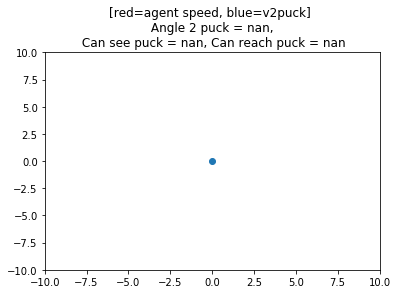

In [1001]:
# For the `can_see_puck` case, debug with root_dir = "/Users/luisd/luis-simulation/fetchpuck_minmoves5", ag_idx = 24
ag_idx = 24 # 3382
x = agents_df.loc[ag_idx]["pos_x"] # [agents_df["timestamp"] == 0.65]
y = agents_df.loc[ag_idx]["pos_y"]
sp_x = agents_df.loc[ag_idx]["speed_x"]
sp_y = agents_df.loc[ag_idx]["speed_y"]
topuck_x = agents_df.loc[ag_idx]["topuck_x"]
topuck_y = agents_df.loc[ag_idx]["topuck_y"]
angletopuck = agents_df.loc[ag_idx]["angle2puck"]
lastaction = agents_df.loc[ag_idx]["last_action"]
# plt.quiver([0, 0, 0], [0, 0, 0], [1, -2, 4], [1, 2, -7], angles='xy', scale_units='xy', scale=1)
plt.quiver([x, x], [y, y], [sp_x, topuck_x], [sp_y, topuck_y], angles='xy', scale_units='xy', scale=1, color=['red', 'blue'])
puck_x = agents_df.loc[ag_idx - 1]["pos_x"]
puck_y = agents_df.loc[ag_idx - 1]["pos_y"]
plt.plot([(puck_x)], [(puck_y)],'o')
# plt.plot([(1,2, 3)], [(3,5, 9)],'o')
print("[last action = '%s'] puck in (%.2f, %.2f), agent in (%.2f, %.2f), moving towards (%.4f, %.4f)" % (lastaction, puck_x, puck_y, x, y, sp_x, sp_y))
min_x = min([x, x - sp_x, puck_x]) - 10
max_x = max([x, x + sp_x, puck_x]) + 10
min_y = min([y, y - sp_y, puck_y]) - 10
max_y = max([y, y + sp_y, puck_y]) + 10
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
can_see_puck = agents_df.loc[ag_idx]["can_see_puck"]
can_reach_puck = agents_df.loc[ag_idx]["can_reach_puck"]
plt.title("[red=agent speed, blue=v2puck] \n Angle 2 puck = %s, \n Can see puck = %s, Can reach puck = %s" % (angletopuck, can_see_puck, can_reach_puck))
plt.show()

In [1002]:
agents_df[["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y",  "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,can_see_puck,can_reach_puck
0,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.05,14,14,-0.000000e+00,-0.000000e+00,True,False
1,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,0.05,0,0,0.000000e+00,0.000000e+00,NaN,NaN
2,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.10,14,14,0.000000e+00,-0.000000e+00,True,False
3,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,0.10,0,0,0.000000e+00,0.000000e+00,NaN,NaN
4,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.15,14,14,-0.000000e+00,-0.000000e+00,False,False
5,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,0.15,0,0,0.000000e+00,0.000000e+00,NaN,NaN
6,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.20,14,14,0.000000e+00,-0.000000e+00,True,False
7,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,0.20,0,0,0.000000e+00,0.000000e+00,NaN,NaN
8,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.25,13,14,-1.000000e+00,-1.010643e-15,True,False
9,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,0.25,0,0,0.000000e+00,0.000000e+00,NaN,NaN


## Puck movement

### Is it moving at all?

In [1003]:
all_puck_movs = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == True]
# all_puck_movs

Text(0.5,0,'Step')

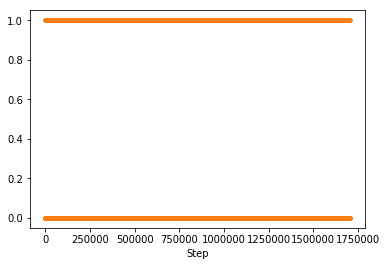

In [1004]:
# all_puck_movs.plot(x='Step', y=['pos_x', 'pos_y'], style='.')
puck_x, = plt.plot(all_puck_movs['pos_x'], '.')
puck_y, = plt.plot(all_puck_movs['pos_y'], '.')
plt.xlabel("Step")
# plt.xlim([71775, 72270])

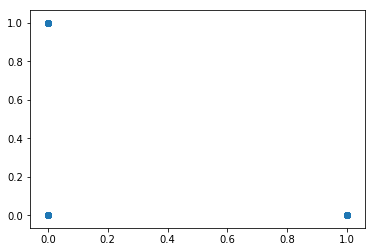

In [1005]:
plt.scatter(x=all_puck_movs['pos_x'], y=all_puck_movs['pos_y'])

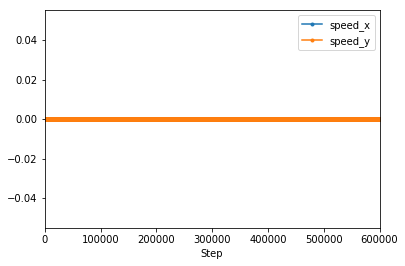

In [1006]:
all_puck_movs.plot(x='Step', y=['speed_x', 'speed_y'], style='.-')

### All events done by agents (ie, NOT puck)

In [1007]:
all_players_actions = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == False]
all_players_actions = all_players_actions.sort_values(by=('timestamp'))
all_players_actions.index = np.arange(all_players_actions.shape[0])

In [1008]:
# all_players_actions[
#             all_players_actions.timestamp.between(left=74, right=75)]

In [1009]:
# all 'shots' and 'passes' 
# all_players_actions[
#     (all_players_actions['last_action'].str.contains("send puck", na=False) == True) & 
#     (all_players_actions['last_action'].str.contains("[FAILED]", na=False) == False)
# ]

### All failed actions:

In [1010]:
# agents_df[agents_df['last_action'].str.contains("FAILED", na=False)]

### All successful GRABs:

In [1011]:
df_succ_grabs1 = all_players_actions[
    all_players_actions['have_puck'] == True
]
num_episodes1 = len(df_succ_grabs1)
print("The agent played %d episodes" % (num_episodes1))

The agent played 6658 episodes


In [1012]:
idx_first_episode = df_succ_grabs1.index[0]
df_succ_grabs1.index[:10]

Int64Index([62, 145, 247, 483, 549, 657, 1037, 1186, 1252, 1413], dtype='int64')

In [1013]:
all_players_actions[idx_first_episode - 2:idx_first_episode + 2][["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y", "last_action", "have_puck", "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,last_action,have_puck,can_see_puck,can_reach_puck
60,forward_78130925-bc9b-4e95-816f-be1412445ceb,3.05,3,0,-4.624589e-15,1.000000e+00,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
61,forward_78130925-bc9b-4e95-816f-be1412445ceb,3.10,2,0,-1.000000e+00,4.318427e-15,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
62,forward_78130925-bc9b-4e95-816f-be1412445ceb,3.15,1,0,-1.000000e+00,4.563357e-15,"Move => speed = 1.00 feet/sec, direction = Ang...",True,True,True
63,forward_78130925-bc9b-4e95-816f-be1412445ceb,3.20,14,14,-0.000000e+00,-0.000000e+00,NaN,False,True,False


In [1014]:
df_episode1 = all_players_actions[:idx_first_episode][["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y", "last_action", "have_puck", "can_see_puck", "can_reach_puck"]]

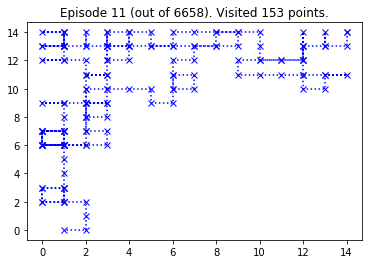

In [1015]:
episode_number = 11 # 789 # 15385
an_episode = all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number] + 1]
# an_episode = df_episode1
# an_episode = all_players_actions
# an_episode[:10]["pos_x"]
# an_episode[:10]["pos_y"]
_ = plt.plot(an_episode["pos_x"], an_episode["pos_y"], 'bx:')
# _ = plt.plot(all_players_actions["pos_x"], all_players_actions["pos_y"], 'bx:')
_ = plt.title("Episode %d (out of %d). Visited %d points." % (episode_number, num_episodes1, len(an_episode)))
plt.show()


In [1016]:
an_episode

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
1497,1497,forward_78130925-bc9b-4e95-816f-be1412445ceb,74.90,14,14,-0.000000e+00,-0.000000e+00,0.0,-14.0,-14.0,"Angle in radians = 0.785 (Pi/2: 1.571, Pi:3.14...",NaN,False,True,False
1498,1498,forward_78130925-bc9b-4e95-816f-be1412445ceb,74.95,14,14,0.000000e+00,0.000000e+00,0.0,-14.0,-14.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...","Move => speed = 0.00 feet/sec, direction = Ang...",False,True,False
1499,1499,forward_78130925-bc9b-4e95-816f-be1412445ceb,75.00,14,13,1.836970e-16,-1.000000e+00,1.0,-14.0,-13.0,"Angle in radians = 5.461 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
1500,1500,forward_78130925-bc9b-4e95-816f-be1412445ceb,75.05,13,13,-1.000000e+00,1.224647e-16,1.0,-13.0,-13.0,"Angle in radians = 0.785 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
1501,1501,forward_78130925-bc9b-4e95-816f-be1412445ceb,75.10,13,14,6.123234e-17,-1.000000e+00,1.0,-13.0,-14.0,"Angle in radians = 5.535 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
1502,1502,forward_78130925-bc9b-4e95-816f-be1412445ceb,75.15,13,13,-1.836970e-16,-1.000000e+00,1.0,-13.0,-13.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
1503,1503,forward_78130925-bc9b-4e95-816f-be1412445ceb,75.20,12,13,-1.000000e+00,5.665539e-16,1.0,-12.0,-13.0,"Angle in radians = 0.825 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
1504,1504,forward_78130925-bc9b-4e95-816f-be1412445ceb,75.25,12,12,-1.071875e-15,-1.000000e+00,1.0,-12.0,-12.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
1505,1505,forward_78130925-bc9b-4e95-816f-be1412445ceb,75.30,11,12,-1.000000e+00,1.454732e-15,1.0,-11.0,-12.0,"Angle in radians = 0.829 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
1506,1506,forward_78130925-bc9b-4e95-816f-be1412445ceb,75.35,10,12,-1.000000e+00,1.454732e-15,1.0,-10.0,-12.0,"Angle in radians = 0.876 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False


In [1017]:
all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number]][["timestamp", "pos_x", "pos_y", "speed_x", "speed_y"]]

,timestamp,pos_x,pos_y,speed_x,speed_y
1497,74.90,14,14,-0.000000e+00,-0.000000e+00
1498,74.95,14,14,0.000000e+00,0.000000e+00
1499,75.00,14,13,1.836970e-16,-1.000000e+00
1500,75.05,13,13,-1.000000e+00,1.224647e-16
1501,75.10,13,14,6.123234e-17,-1.000000e+00
1502,75.15,13,13,-1.836970e-16,-1.000000e+00
1503,75.20,12,13,-1.000000e+00,5.665539e-16
1504,75.25,12,12,-1.071875e-15,-1.000000e+00
1505,75.30,11,12,-1.000000e+00,1.454732e-15
1506,75.35,10,12,-1.000000e+00,1.454732e-15


In [1018]:
# all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number]][["timestamp", "pos_x", "pos_y", "last_action"]]
ll = all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number]]["last_action"].tolist()
ll

[nan,
 'Move => speed = 0.00 feet/sec, direction = Angle in radians: 3*Pi/2 (= 4.7124), so I am going Vec2d(-0.0, -0.0)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: 3*Pi/2 (= 4.7124), so I am going Vec2d(-1.8369701987210297e-16, -1.0)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: Pi (= 3.1416), so I am going Vec2d(-1.0, 1.2246467991473532e-16)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: Pi / 2 (= 1.5708), so I am going Vec2d(6.123233995736766e-17, 1.0)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: 3*Pi/2 (= 4.7124), so I am going Vec2d(-1.8369701987210297e-16, -1.0)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: Pi (= 3.1416), so I am going Vec2d(-1.0, 5.66553889764798e-16)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: 3*Pi/2 (= 4.7124), so I am going Vec2d(-1.0718754395722282e-15, -1.0)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: Pi (= 3.1416), so I 

In [1019]:
# # df_succ_grabs = all_players_actions[
# #     all_players_actions['last_action'].str.contains("Grab", na=False) & 
# #     (all_players_actions['last_action'].str.contains("FAILED", na=False) == False)
# # ]
# df_succ_grabs = agents_df[
#     agents_df['last_action'].str.contains("Grab", na=False) & 
#     (agents_df['last_action'].str.contains("FAILED", na=False) == False)
# ]
df_succ_grabs = agents_df[
    agents_df['have_puck'] == True
]
num_episodes = len(df_succ_grabs)
print("The agent played %d episodes" % (num_episodes))


The agent played 6658 episodes


In [1020]:
df_succ_grabs.index[:10]

Int64Index([124, 290, 494, 966, 1098, 1314, 2074, 2372, 2504, 2826], dtype='int64')

In [1021]:
# all_players_actions.iloc[2755:2763]
agents_df.iloc[6596:7000][["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y", "last_action", "have_puck", "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,last_action,have_puck,can_see_puck,can_reach_puck
6596,forward_78130925-bc9b-4e95-816f-be1412445ceb,164.95,9,8,-1.000000e+00,2.342911e-15,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
6597,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,164.95,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6598,forward_78130925-bc9b-4e95-816f-be1412445ceb,165.00,8,8,-1.000000e+00,2.342911e-15,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
6599,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,165.00,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6600,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,165.05,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6601,forward_78130925-bc9b-4e95-816f-be1412445ceb,165.05,8,9,2.725768e-15,1.000000e+00,"Move => speed = 1.00 feet/sec, direction = Ang...",False,False,False
6602,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,165.10,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6603,forward_78130925-bc9b-4e95-816f-be1412445ceb,165.10,9,9,1.000000e+00,-2.909465e-15,"Move => speed = 1.00 feet/sec, direction = Ang...",False,False,False
6604,forward_78130925-bc9b-4e95-816f-be1412445ceb,165.15,9,8,-3.736411e-15,-1.000000e+00,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
6605,puck_fef9ab23-3bf2-4631-acac-cd5a97139b04,165.15,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN


2400


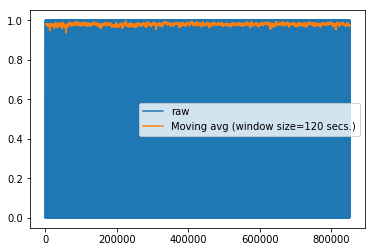

In [1022]:
speeds = all_players_actions["speed_magnitude"].tolist()
raw, = plt.plot(speeds, '-', label="raw")
window_size_in_secs = 120
window_size = int(round(window_size_in_secs / seconds_between_events))
print(window_size)

r_mean = running_mean(speeds, N = window_size)
rm, = plt.plot(range(window_size - 1, len(speeds)), r_mean, label='Moving avg (window size=%d secs.)' % (window_size_in_secs))
plt.legend(handles=[raw, rm])
# plt.xlim([2.5e6, 2.5e6 + 3000])

In [1023]:
print(len(all_players_actions.index))
print(len(all_players_actions.index.unique()))

852000
852000


In [1024]:
all_players_actions.index[0:10]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [1025]:
all_players_actions.index.max()

851999

In [1026]:
all_players_actions[:3]

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
0,0,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.05,14,14,-0.0,-0.0,0.0,-14.0,-14.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...",NaN,False,True,False
1,1,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.10,14,14,0.0,-0.0,0.0,-14.0,-14.0,"Angle in radians = 0.785 (Pi/2: 1.571, Pi:3.14...","Move => speed = 0.00 feet/sec, direction = Ang...",False,True,False
2,2,forward_78130925-bc9b-4e95-816f-be1412445ceb,0.15,14,14,-0.0,-0.0,0.0,-14.0,-14.0,"Angle in radians = 2.356 (Pi/2: 1.571, Pi:3.14...","Move => speed = 0.00 feet/sec, direction = Ang...",False,False,False


Zooming in to last 2000 episodes (out of 6658)


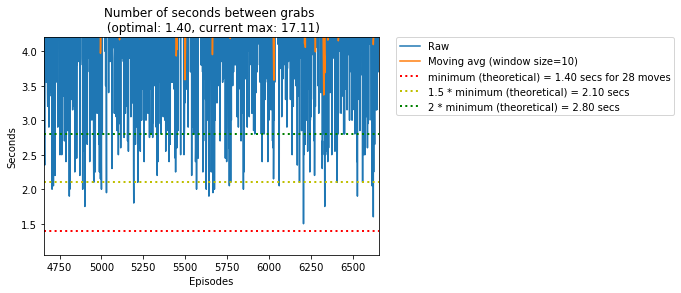

In [1031]:
num_min_secs = num_min_moves * seconds_between_events
two_time_num_min_secs = 2 * num_min_secs
one_and_half_time_num_min_secs = 1.5 * num_min_secs
num_opt_plot = plt.axhline(
    y=num_min_secs,
    linewidth=2, 
    color='r', 
    label='minimum (theoretical) = %.2f secs for %d moves' % (num_min_secs, num_min_moves),
    linestyle=':')

timestamps_grabs = agents_df.iloc[df_succ_grabs.index]["timestamp"].tolist()
seconds_between = [(time2 - time1) for time1, time2 in zip(timestamps_grabs, timestamps_grabs[1:])]
seconds_between_plot, = plt.plot(seconds_between, label='Raw')
window_size = 10
r_mean = running_mean(seconds_between, N = window_size)
moving_avg_plot, = plt.plot(range(window_size - 1, len(seconds_between)), r_mean, label='Moving avg (window size=%d)' % (window_size))
two_num_opt_plot = plt.axhline(
    y=two_time_num_min_secs,
    linewidth=2, 
    color='g', 
    label='2 * minimum (theoretical) = %.2f secs' % (2 * num_min_secs), 
    linestyle=':')
one_and_half_num_opt_plot = plt.axhline(
    y=one_and_half_time_num_min_secs,
    linewidth=2, 
    color='y', 
    label='1.5 * minimum (theoretical) = %.2f secs' % (1.5 * num_min_secs), 
    linestyle=':')
_ = plt.legend(handles=[seconds_between_plot, moving_avg_plot, num_opt_plot, one_and_half_num_opt_plot, two_num_opt_plot], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


_ = plt.xlabel("Episodes")
_= plt.ylabel("Seconds")
_ = plt.title("Number of seconds between grabs \n (optimal: %.2f, current max: %.2f)" % (num_min_secs, np.amax(r_mean)))
display_how_many_episodes = 2000
print("Zooming in to last %d episodes (out of %d)" % (display_how_many_episodes, num_episodes))
_ = plt.xlim([num_episodes - display_how_many_episodes, num_episodes])
# # plt.xlim([1000,1600])
_ = plt.ylim([0.75 * num_min_secs, 3 * num_min_secs])
# _ = plt.ylim([0.75 * num_min_secs, 1.05 * np.amax(r_mean)]) # 1.10 * np.amax(seconds_between)]) 


In [1028]:
import math
bucket_in_minutes = 1
events_with_puck = []
for curr_minute in range(0, int(math.ceil(max_timestamp_in_minutes)), bucket_in_minutes):
    min_second = curr_minute * 60 # (curr_minute - bucket_in_minutes) * 60
    max_second = min_second + bucket_in_minutes * 60 # curr_minute * (bucket_in_minutes * 60)
    num_events = len(
        all_players_actions[
            all_players_actions.timestamp.between(left=min_second, right=max_second) & \
            all_players_actions['have_puck'] == True
        ]
    )
    events_with_puck.append(num_events)
    # print("second: %d, num events: %d" % (curr_second, num_events))
    # len(all_players_actions[all_players_actions['timestamp'] <= curr_second))

710 minutes, so there are 711 buckets of 1' long each


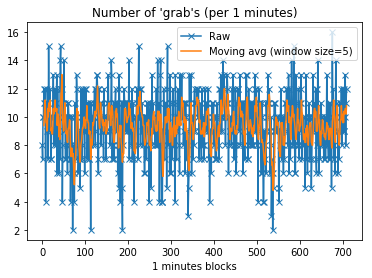

In [1029]:
print("%d minutes, so there are %d buckets of %d' long each" % (max_timestamp_in_minutes, max_timestamp_in_minutes//bucket_in_minutes + 1, bucket_in_minutes))
events_with_puck_plot, = plt.plot(events_with_puck, 'x-', label="Raw")
window_size = 5
r_mean = running_mean(events_with_puck, N = window_size)
moving_avg_plot, = plt.plot(range(window_size - 1, len(events_with_puck)), r_mean, label='Moving avg (window size=%d)' % (window_size))
_ = plt.legend(handles=[events_with_puck_plot, moving_avg_plot])

_ = plt.xlabel("%d minutes blocks" % bucket_in_minutes)
# plt.ylabel("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
_ = plt.title("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
# plt.xlim([len(events_with_puck) - 100, len(events_with_puck)])
# print("Only plotting from block %d to %d" % (len(events_with_puck) - 100, len(events_with_puck)))

In [1030]:
# import pickle
# from hockey.behaviour.core.action import HockeyAction
# from hockey.behaviour.core.bitstring_environment_state import BitstringEnvironmentState

# brain_file = "/Users/luisd/luis-simulation/models/brainfetchpuck_minmoves2.bin"
# model = pickle.load(open(brain_file, 'rb'))
# print("%d rules read." % (len(model)))
# best_fitness_rule_and_fitness = (None, -10)
# for rule in model:
# #     if rule.fitness > .5:
# #         print(rule.condition, '=>', rule.action, ' [%.5f, experience: %d]' % (rule.fitness, rule.experience))
#     if  rule.action == HockeyAction.GRAB_PUCK:
#         print(rule.condition, '=>', rule.action, ' [%.5f, experience: %d]' % (rule.fitness, rule.experience))
#         if best_fitness_rule_and_fitness[1] < rule.fitness:
#             best_fitness_rule_and_fitness = (rule, rule.fitness)
# best_rule = best_fitness_rule_and_fitness[0]
# print("Best rule for 'GRAB_PUCK' is ")
# print(best_rule.condition, '=>', best_rule.action, ' [%.5f, experience: %d]' % (best_rule.fitness, best_rule.experience))
# print(BitstringEnvironmentState.explain_condition(condition=best_fitness_rule_and_fitness[0].condition))

# SCRATCH PAPER DOWN HERE